# Data Science for Marketing | Practical Exam
## Introduction

In the practical exam, you will have ~7 days to work on a set of questions related to the analysis of different datasets. <br>
This activity does not intend to test your ability as a programmer.<br>
Instead, it aims to test your ability to study different problems using data-driven approaches using Statistical, Unsupervised, and Supervised Learning methods to support your decisions/conclusions.

**Notes** <br>
* All data your reported analysis needs to be reproducible in this notebook; <br>
* The task is individual but students are invited to discuss and brainstorm in group, which is a very effective learning strategy; <br>
* You should document all steps and code, failing to do so can lead to a penalty; <br>
* If you sourced code from third-party sources you should cite them; <br>
* This is an individual activity and weights 50% (10 points) of your final mark;<br>
* Feel free to answer questions in Portuguese; <br>
* Consider taking the most of the available Python libraries that you were introduced to during the semester, and feel free to explore aditional ones.

**Submission Details** <br>
The deadline for the submission is December 15th at 23:59. Submission through the corresponding activity in the Curricular Unit Moodle page. Your submission should consist of an archive __(zip file only)__ containing the following documents: <br>
1) A copy of this notebook with your answers in .ipynb format; <br>
2) A HTML version of the notebook with your answers (File -> Download As -> HTML); <br>
3) The Authorship Statement signed; <br> 

Documents 1) and 2) should be named with your student number, _e.g. M2020123.ipynb and M2020123.html_ <br>
__Submissions in .rar archives will not be graded.__ <br>
Submissions missing the original jupyter notebook format will not be graded.<br>
You do not need to include the datasets with the notebook <br>
Failing to comply with these guidelines will incur in a penalty. <br>
Late Submissions will incur a penalty of 1 point per day late.

### Good Luck, and enjoy!

## Details

Fill this cell with your following details:

Name: Sara Nunes <br>
StudentID: m20201111 <br>
E-Mail: m20201111@novaims.unl.pt <br>

## Boilerplate

Before we start, let us make sure that we have all the necessary packages installed in our working environment. We will also organize our file structure by creating a DATA folder to store all datasets. <br>
To that end, run the following cells to install and load all the necessary libraries. <br>
You can check in the third cell the output with  the versions of the main libraries that have been used in the preparation of this exam.

In [393]:
import sys
!{sys.executable} -m pip install --upgrade pip --user
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn

In [394]:
import shutil
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests
import sklearn as sc
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')

In [395]:
print('Pandas version ',pd.__version__)
print('Numpy version ',np.__version__)
print('Scipy version ',sp.__version__)
print('Seaborn version ',sns.__version__)
print('Scikit-Learn version ',sc.__version__)

Pandas version  1.0.5
Numpy version  1.18.5
Scipy version  1.5.0
Seaborn version  0.10.1
Scikit-Learn version  0.23.1


In [609]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Part I - Exploratory Data Analysis (25% | 5 points)

In the first part of the practical exam, we will explore a dataset on a Marketing Campaign for Banking.
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

_Source - [Moro et al., 2014] S. Moro, P. Cortez, and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014_

The aim of Part I is to apply statistical methods in order to develop a deeper understanding of the dataset and problem. A good first step to have a more educated guess on what steps should follow.

In order to download the data to your computer, start by running the cell below. <br>
The data is in a .csv file with the name "bank_dataset", there is also an auxiliary .txt file with the name "bank_dataset_description" that provides a short description of all features in the dataset.<br>

Notes: <br>
- Consider also the method .pivot_table() as an alternative to .grouby() or .agg(). You can find more details at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html.
- Consider using data visualization (using pandas plot or Seaborn) to report your results.

Answer each question in Markup Cell and use visualizations whenever you can to support your findings.

In [397]:
r = requests.get('https://www.dropbox.com/s/sifhl86lalrxs2v/partiv2.zip?dl=1', allow_redirects=True)
open('partiv2.zip', 'wb').write(r.content);
with ZipFile('partiv2.zip', 'r') as zipObj:
   zipObj.extractall('DATA')
shutil.rmtree('DATA/__MACOSX')

Load the dataset to a Pandas Dataframe.

In [398]:
df = pd.read_csv('bank_dataset.csv',sep=';')

In [399]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**[Q1]** Describe the variables present in the dataset. Are there missing values? Should you process or clean any of the variables, how and why? Perform the necessary steps.

In [400]:
# Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [401]:
#Number of missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [402]:
df = df.replace(to_replace = ['yes','no'],value = ['1','0'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


The y variable needs to be changed to an int since it is how it is described in the text file and because the other binary variables are also integers

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In this dataset, we can verify that we have:

- 5 variables with the type float;
- 5 variables that are integer;
- 11 variables that are objects, which is the same as to say categorical variables.

We can conclude that we have no missing values

We do not need to clean any of the other variables since the data types match the expected

**[Q2]** How many observations are in the dataset?

In [404]:
df.shape

(41188, 21)

There are 41188 observations

**[Q3]** What is the distribution of ages and education of clients?

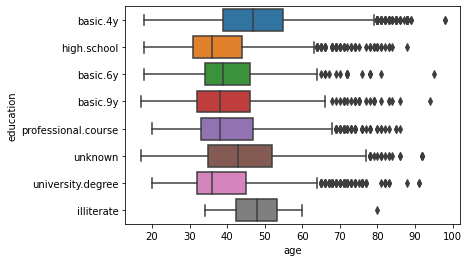

In [405]:
box = sns.boxplot(x = 'age', y = 'education', data = df)

**[Q4]** What is the age of the youngest and oldest client that has the value celular in the feature contact?

In [406]:
celular = df[df['contact']=='cellular']
youngest = celular['age'].min()
oldest = celular['age'].max()
print('The youngest client is',youngest, 'and the oldest is',oldest)

The youngest client is 17 and the oldest is 98


**[Q5]** What is the average, minimum, and maximum age of clients by marital status?

In [407]:
df.groupby('marital')['age'].agg(['mean', 'min', 'max'])

,mean,min,max
marital,,,
divorced,44.899393,24,95
married,42.307165,20,98
single,33.158714,17,86
unknown,40.275000,25,66


**[Q6]** Estimate the correlations between the existing numerical variables. What can you conclude? For instance, which variable(s) show a high/low correlations with the target (subscription of the product)?

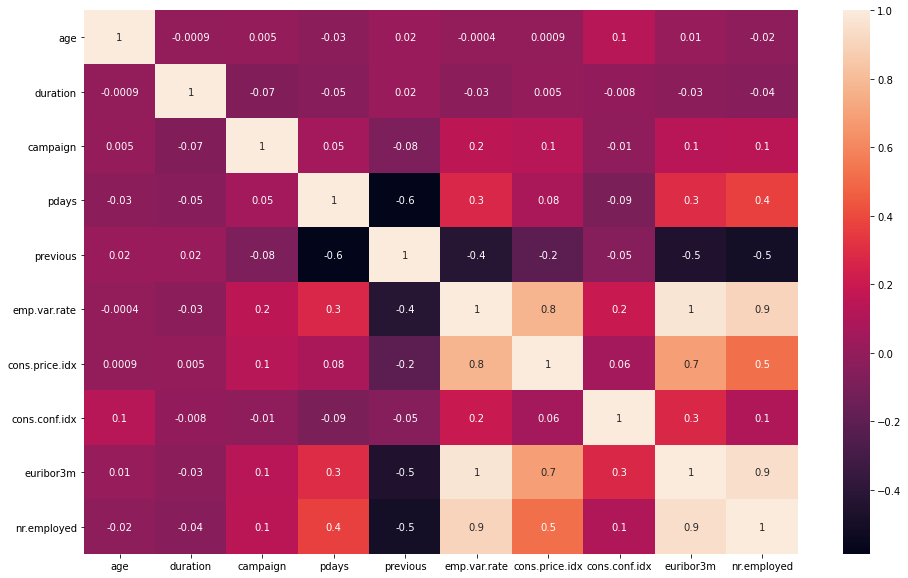

In [408]:
corr = df.corr()
figure = plt.figure(figsize=(16,10))
sns.heatmap(data = corr, annot=True, fmt = '.1g')

**[Q7]** What is the percentage of success of the campaign? Estimate the success by comparing the number of subscribers with the total number of clients reached during the phone campaign.

In [409]:
success = df[df['y']==1]
percentage = len(success)/len(df)*100
print('The percentage of success of the campaign was', percentage)

The percentage of success of the campaign was 0.0


**[Q8]** What is the typical contact type by marital state and job?

In [410]:
df.groupby(['marital','job'])['contact'].value_counts().transpose()

marital   job            contact  
divorced  admin.         cellular      837
                         telephone     443
          blue-collar    cellular      371
                         telephone     357
          entrepreneur   cellular      115
                         telephone      64
          housemaid      cellular       96
                         telephone      65
          management     cellular      196
                         telephone     135
          retired        cellular      244
                         telephone     104
          self-employed  cellular       88
                         telephone      45
          services       cellular      307
                         telephone     225
          student        cellular        8
                         telephone       1
          technician     cellular      564
                         telephone     210
          unemployed     cellular       74
                         telephone      50
          unknown  

**[Q9]** What is the relative number of clients per job?

In [411]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

**[Q10]** What is the average age of clients by marital state and contact type?

In [92]:
df.groupby(['marital','contact'])['age'].mean()

marital   contact  
divorced  cellular     45.211829
          telephone    44.366197
married   cellular     42.789425
          telephone    41.552870
single    cellular     32.686975
          telephone    34.206628
unknown   cellular     38.905660
          telephone    42.962963
Name: age, dtype: float64

**[Q11]** If you were asked to study this dataset and develop a model to aid in the next phone campaign of the same Bank, which approach would you follow? <br>
__Provide a discussion, the question does not require any further programming or analytics.__

To develop a model to aid in the next phone campaign I would use __Logistic Regression__ to find what variables influence more the target.
I would use this model because the target (dependent variable) that we want to predict (campaign success or not) is binary. What this model gives is the probability of the value labeled "1" (success) going from 0 to 1.

## Part II - Supervised and Unsupervised Learning (35% | 7 points)

In the second part of the Practical Exam, you have to choose between one of two challenges. <br> 
The first involves the use of a regression model to obtain insights on which features help explain houses Sales prices. The second challenge asks you to perform the clustering of an agnostic dataset and compare the results from K-Means with Hierarchical clustering algorithms.

__You are not required to solve both challenges.__ <br>
Instead, you have to choose one. However, your choice incurs in a cost. <br>
- If you choose to do the first challenge (II.1) it will require a bit more work, including data exploration due to a large number of features, but it will grant you the opportunity to obtain the full 7 points from Part II;<br>
- If you choose to do the second challenge, it will be slightly more straightforward as it is not necessary data exploration, but you will only be able to achieve a maximum of 5 points from Part II. <br>

Delete the cells from the challenge (II.1 ) or (II.2) that you do not want to count for grading. <br>
If you leave both we will only grade II.2 <br>

### II.1 - Supervised Learning (7 points)

In this task we ask you to use a **multi-linear regression model** to invesgate which variables are better predictors of the Sale Price of a house. <br> The dataset includes 81 features from 2919 sales. <br>

Let's start by downloading the data files to your computer. You can do that by running the cell below.

In [831]:
r = requests.get('https://www.dropbox.com/s/1fcws6aaodry54n/partii.zip?dl=1', allow_redirects=True)
open('partii.zip', 'wb').write(r.content);
with ZipFile('partii.zip', 'r') as zipObj:
   zipObj.extractall('DATA')
shutil.rmtree('DATA/__MACOSX')

You have downloaded two files to your computer. <br>
The data is in a .csv file with the name "house_dataset", but there is also an auxiliary .txt file with the name "house_dataset_description" that provides a short description of all features in the dataset. <br>
The target for the regression is the variable SalePrice. <br>

Load the file to a pandas dataframe.<br>

In [920]:
house = pd.read_csv('house_dataset.csv')
house.head(10)

,Unnamed: 0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1,1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,2,2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,3,3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,4,4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
5,5,5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,NaN
6,6,6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal,NaN
7,7,7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,NaN
8,8,8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,NaN
9,9,9,1470,20,R

In [921]:
# change columns name 
house.rename(columns={'1stFlrSF': 'FirstFlrSF', '2ndFlrSF': 'SecondFlrSF', '3SsnPorch':'ThreeSsnPorch'}, inplace = True)

In [922]:
# see what data types we have
house.dtypes

Unnamed: 0         int64
index              int64
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64


In [923]:
house.isna().sum()

Unnamed: 0          0
index               0
Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
FirstFlrSF

In [924]:
# replace NaN value with median since there are only a few missing rows and it is a numerical variable

house['MasVnrArea'].fillna(house['MasVnrArea'].median(), inplace=True)
house['BsmtFinSF1'].fillna(house['BsmtFinSF1'].median(), inplace=True)
house['BsmtFinSF2'].fillna(house['BsmtFinSF2'].median(), inplace=True)
house['BsmtUnfSF'].fillna(house['BsmtUnfSF'].median(), inplace=True)
house['BsmtFullBath'].fillna(house['BsmtFullBath'].median(), inplace=True)
house['BsmtHalfBath'].fillna(house['BsmtHalfBath'].median(), inplace=True)
house['GarageCars'].fillna(house['GarageCars'].median(), inplace=True)
house['GarageArea'].fillna(house['GarageArea'].median(), inplace=True)

In [925]:
# replace NaN values with mode because there are only a few missing rows and it is a numerical variable


house['KitchenQual'].fillna(house['KitchenQual'].mode(), inplace=True)
house['MSZoning'].fillna(house['MSZoning'].mode(), inplace=True)
house['Utilities'].fillna(house['Utilities'].mode(), inplace=True)
house['Exterior1st'].fillna(house['Exterior1st'].mode(), inplace=True)
house['Exterior2nd'].fillna(house['Exterior2nd'].mode(), inplace=True)
house['MasVnrType'].fillna(house['MasVnrType'].mode(), inplace=True)
house['Functional'].fillna(house['Functional'].mode(), inplace=True)
house['SaleType'].fillna(house['SaleType'].mode(), inplace=True)
house['BsmtCond'].fillna(house['BsmtCond'].mode(), inplace=True)
house['BsmtQual'].fillna(house['BsmtQual'].mode(), inplace=True)
house['BsmtExposure'].fillna(house['BsmtExposure'].mode(), inplace=True)
house['BsmtFinType1'].fillna(house['BsmtFinType1'].mode(), inplace=True)
house['BsmtFinType2'].fillna(house['BsmtFinType2'].mode(), inplace=True)
house['Electrical'].fillna(house['Electrical'].mode(), inplace=True)

In [926]:
# Drop the missing values on Sale Price, we do this because the frequency of the missig values is very high and it is our target variable so we can not drop the column
house.dropna(subset=['SalePrice'],inplace=True)

In [927]:
# Drop the columns LotFrontage, PoolQC, MiscFeature,Fence , Alley, FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond since the frequency of missing values is very high 

house.drop(columns=['LotFrontage', 'PoolQC','MiscFeature','Fence','Alley','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'], inplace=True)

In [928]:
# change data types 
# we can change the type of the kitchen quality variable and assign int values to it so we can do further analysis
house.KitchenQual[house.KitchenQual == 'Ex'] = 5
house.KitchenQual[house.KitchenQual == 'Gd'] = 4
house.KitchenQual[house.KitchenQual == 'TA'] = 3
house.KitchenQual[house.KitchenQual == 'Fa'] = 2
house.KitchenQual[house.KitchenQual == 'Po'] = 1

house['KitchenQual'] = house['KitchenQual'].astype(int)

print(house['KitchenQual']) 

1459    4
1460    3
1461    4
1462    4
1463    4
       ..
2914    3
2915    3
2916    4
2917    4
2918    3
Name: KitchenQual, Length: 1460, dtype: int32


In [929]:
house.ExterQual[house.ExterQual == 'Ex'] = 5
house.ExterQual[house.ExterQual == 'Gd'] = 4
house.ExterQual[house.ExterQual == 'TA'] = 3
house.ExterQual[house.ExterQual == 'Fa'] = 2
house.ExterQual[house.ExterQual == 'Po'] = 1

house['ExterQual'] = house['ExterQual'].astype(int)

print(house['ExterQual']) 

1459    4
1460    3
1461    4
1462    3
1463    4
       ..
2914    3
2915    3
2916    5
2917    3
2918    4
Name: ExterQual, Length: 1460, dtype: int32


In [930]:
house.ExterCond[house.ExterCond == 'Ex'] = 5
house.ExterCond[house.ExterCond == 'Gd'] = 4
house.ExterCond[house.ExterCond == 'TA'] = 3
house.ExterCond[house.ExterCond == 'Fa'] = 2
house.ExterCond[house.ExterCond == 'Po'] = 1

house['ExterCond'] = house['ExterCond'].astype(int)

print(house['ExterCond']) 

1459    3
1460    3
1461    3
1462    3
1463    3
       ..
2914    3
2915    3
2916    4
2917    3
2918    3
Name: ExterCond, Length: 1460, dtype: int32


In [931]:
house.HeatingQC[house.HeatingQC == 'Ex'] = 5
house.HeatingQC[house.HeatingQC == 'Gd'] = 4
house.HeatingQC[house.HeatingQC == 'TA'] = 3
house.HeatingQC[house.HeatingQC == 'Fa'] = 2
house.HeatingQC[house.HeatingQC == 'Po'] = 1

house['HeatingQC'] = house['HeatingQC'].astype(int)

print(house['HeatingQC']) 

1459    5
1460    5
1461    5
1462    4
1463    5
       ..
2914    5
2915    3
2916    5
2917    4
2918    4
Name: HeatingQC, Length: 1460, dtype: int32


In [932]:
# Create a Variable that tells if the house has or not a pool
house['HasPool'] = house['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [933]:
# Drop previous pool area variable
house.drop(columns=['PoolArea'],inplace=True)

In [934]:
# Replace the binary variables to 1 and 0 to perform further analysis 
house = house.replace(to_replace = ['Y','N'],value = ['1','0'])
house

,Unnamed: 0,index,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool
1459,1459,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,5,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,Typ,0,2.0,548.0,1,0,61,0,0,0,0,2,2008,WD,Normal,208500.0,0
1460,1460,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,Typ,1,2.0,460.0,1,298,0,0,0,0,0,5,2007,WD,Normal,181500.0,0
1461,1461,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,5,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,Typ,1,2.0,608.0,1,0,42,0,0,0,0,9,2008,WD,Normal,223500.0,0
1462,1462,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,4,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,Typ,1,3.0,642.0,1,0,35,272,0,0,0,2,2006,WD,Abnorml,140000.0,0
1463,1463,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,5,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,Typ,1,3.0,836.0,1,192,84,0,0,0,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,5,1,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,3,7,Typ,1,2.0,460.0,1,0,40,0,0,0,0,8,2007,WD,Normal,175000.0,0
2915,2915,1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,3,3,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,3,1,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,3,7,Min1,2,2.0,500.0,1,349,0,0,0,0,0,2,2010,WD,Normal,210000.0,0
2916,2916,1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,5,4,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,5,1,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,4,9,Typ,2,1.0,252.0,1,0,60,0,0,0,2500,5,2010,WD,Normal,266500.0,0
2917,2917,1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,TA,TA,Mn,GLQ,49.0,Rec,1029.0,0.0,1078.0,GasA,4,1,FuseA,1078,0,0,1078,1.0,0.0,1,0,2,1,4,5,Typ,0,1.0,240.0,1,366,0,112,0,0,0,4,2010,WD,Normal,142125.0,0


Perform the necessary Data Exploration to get an intuition about your data. 

**[Q1]** Identify and select a small group, of at most 8 features, that you believe can be relevant in explaining the SalePRice. Support your choice with data analysis, but beware that the choice might include some degree of **subjectivity**, which can be done visually or through analytics but also by reasoning if you have knowladge of the topic. <br>

A good starting point is to try to answer the following questions:<br>
- Are there missing values? How should you handle those situations? <br>
- How many variables do you have of each type (numeric and categoric)?<br>
- Are there relevant categoric variables that require a transformation/encoding before modeling? <br>
- Are there features that require normalization in order to make them comparable for modelling?<br>
- How do variables correlate with each other?<br>

__These are just guidelines, you don't need to explicitly answer them.__<br>

Do the data exploratory and pre-processing steps below. <br>
Then, write a summary of what you have learned with it, and how it helped support your feature selection and data cleaning (e.g., transformations, normalization, filtering, etc). 

**Notes**<br>
- Report just the necessary python code to reproduce your relevant analysis, and be selective in what you show. Showing more can be worse than just selecting the necessary insights or analysis to support your answers and decisions. <br>
- Be objective in your reporting, don't write a master thesis; <br>
- Use data visualization as a way to communicate your findings (one image is worth one thousand words) <br>
- Document carefully all your code, and the rationale behind each step. <br>

## Question 1 

In [935]:
house.describe()

,Unnamed: 0,index,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,HasPool
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2188.500000,729.500000,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,3.39589,3.083562,443.639726,46.549315,567.240411,1057.429452,4.145205,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,6.321918,2007.815753,180921.195890,0.004795
std,421.610009,421.610009,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,0.57428,0.351054,456.098091,161.319273,441.866955,438.705324,0.959501,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.663760,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,2.703626,1.328095,79442.502883,0.069100
min,1459.000000,0.000000,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,1823.750000,364.750000,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,3.000000,0.000000,0.000000,223.000000,795.750000,3.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000
50%,2188.500000,729.500000,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,3.000000,383.500000,0.000000,477.500000,991.500000,5.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000
75%,2553.250000,1094.250000,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,4.00000,3.000000,712.250000,0.000000,808.000000,1298.250000,5.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,0.000000
max,2918.000000,1459.000000,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.00000,5.000000,5644.000000,1474.000000,2336.000000,6110.000000,5.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,5.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000,1.000000


In [936]:
corr=house.corr()
corr

,Unnamed: 0,index,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,HasPool
Unnamed: 0,1.000000,1.000000,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,0.005039,0.029860,-0.005024,-0.005968,-0.007940,-0.015415,-0.015001,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.014973,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,-0.006242,0.021172,0.000712,-0.021917,0.055511
index,1.000000,1.000000,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,0.005039,0.029860,-0.005024,-0.005968,-0.007940,-0.015415,-0.015001,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.014973,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,-0.006242,0.021172,0.000712,-0.021917,0.055511
Id,1.000000,1.000000,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,0.005039,0.029860,-0.005024,-0.005968,-0.007940,-0.015415,-0.015001,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.014973,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,-0.006242,0.021172,0.000712,-0.021917,0.055511
MSSubClass,0.011156,0.011156,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,0.016178,-0.064686,-0.069836,-0.065649,-0.140759,-0.238518,-0.019458,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,-0.012383,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,-0.007683,-0.013585,-0.021407,-0.084284,0.008610
LotArea,-0.033226,-0.033226,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.055570,0.014732,0.214103,0.111170,-0.002618,0.260833,0.003581,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.067864,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.038068,0.001205,-0.014261,0.263843,0.087166
OverallQual,-0.028365,-0.028365,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.726278,0.013953,0.239666,-0.059119,0.308159,0.537808,0.457083,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.673331,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,-0.031406,0.070815,-0.027347,0.790982,0.073907
OverallCond,0.012609,0.012609,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.138942,0.389163,-0.046231,0.040229,-0.136841,-0.171098,-0.014105,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.026707,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,0.068777,-0.003511,0.043950,-0.077856,-0.009158
YearBuilt,-0.012713,-0.012713,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.598160,-0.103925,0.249503,-0.049107,0.149040,0.391452,0.448855,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.530165,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,-0.034383,0.012398,-0.013618,0.522897,0.005953
YearRemodAdd,-0.021998,-0.021998,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.587318,0.074745,0.128451,-0.067759,0.181133,0.291066,0.550017,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.625316,0.191740,0.112581,0.420622,0.371600,0.20572

In [937]:
# Find the most correlated variables
corr=house.corr()
corr['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Unnamed: 0      -0.021917
index           -0.021917
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
ExterCond        0.018899
ThreeSsnPorch    0.044584
MoSold           0.046432
HasPool          0.093708
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
SecondFlrSF      0.319334
WoodDeckSF       0.324413
BsmtFinSF1       0.386420
HeatingQC        0.427649
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
FirstFlrSF       0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
KitchenQual      0.659600
ExterQual   

In [938]:
# Make a copy of the dataset with just the 8 more correlated variables

house_copy = house[['OverallQual', 'GrLivArea', 'ExterQual', 
          'KitchenQual', 'GarageCars', 'GarageArea','TotalBsmtSF','FirstFlrSF','SalePrice']].copy()
house_copy.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,FirstFlrSF,SalePrice
1459,7,1710,4,4,2.0,548.0,856.0,856,208500.0
1460,6,1262,3,3,2.0,460.0,1262.0,1262,181500.0
1461,7,1786,4,4,2.0,608.0,920.0,920,223500.0
1462,7,1717,3,4,3.0,642.0,756.0,961,140000.0
1463,8,2198,4,4,3.0,836.0,1145.0,1145,250000.0


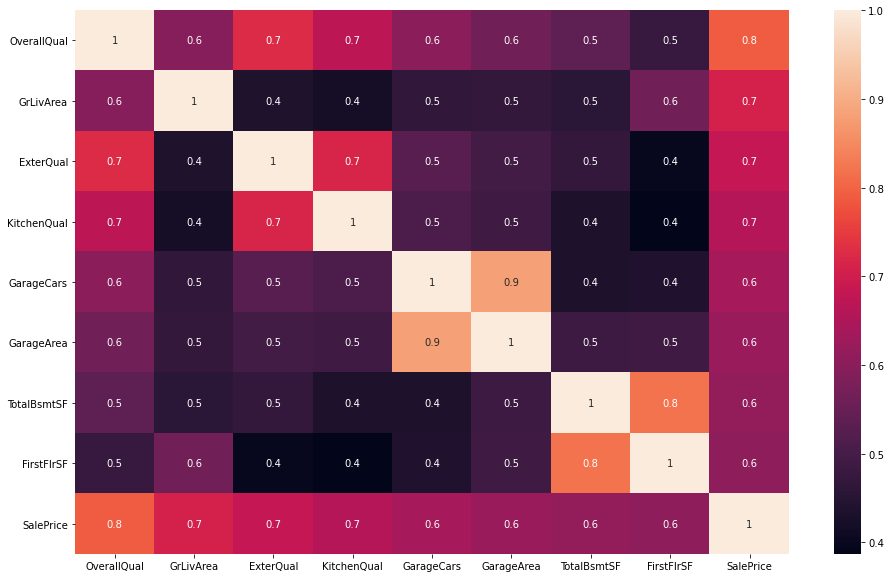

In [940]:
corr = house_copy.corr()
figure = plt.figure(figsize=(16,10))
sns.heatmap(data = corr, annot=True, fmt = '.1g')

We can see that Garage Cars and Garage Area is highly correlated so we do not need both in our model. We will just keep the Garage Cars since it is more correlated with the Sale Price

We will replace the Garage Area variable with FullBath since it was also very correlated with Sale Price

TotalBsmtSF is also very correlated with FirstFlrSF so we will replace FirstFlrSF with TotRmsAbvGrd

In [941]:
# Replace Garage Area with FullBath

house_copy = house[['OverallQual', 'GrLivArea', 'ExterQual', 
          'KitchenQual', 'GarageCars', 'FullBath','TotalBsmtSF','TotRmsAbvGrd','SalePrice']].copy()
house_copy.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,FullBath,TotalBsmtSF,TotRmsAbvGrd,SalePrice
1459,7,1710,4,4,2.0,2,856.0,8,208500.0
1460,6,1262,3,3,2.0,2,1262.0,6,181500.0
1461,7,1786,4,4,2.0,2,920.0,6,223500.0
1462,7,1717,3,4,3.0,1,756.0,7,140000.0
1463,8,2198,4,4,3.0,2,1145.0,9,250000.0


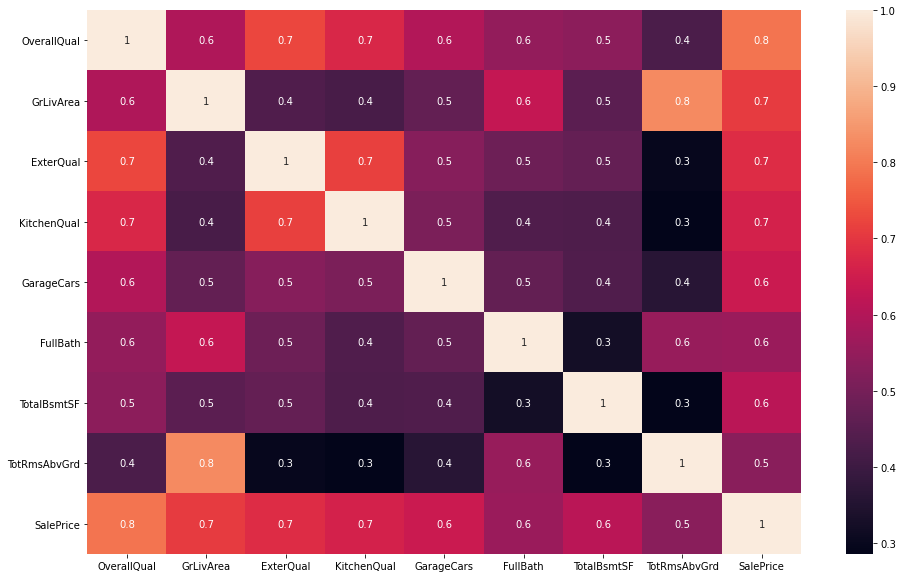

In [942]:
corr = house_copy.corr()
figure = plt.figure(figsize=(16,10))
sns.heatmap(data = corr, annot=True, fmt = '.1g')

In [943]:
# GrLivArea is highly correlated with TotRmsAbvGrd So we will Replace TotRmsAbvGrd with YearBuilt

house = house[['OverallQual', 'GrLivArea', 'ExterQual', 
          'KitchenQual', 'GarageCars', 'FullBath','TotalBsmtSF','YearBuilt','SalePrice']].copy()
house.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,FullBath,TotalBsmtSF,YearBuilt,SalePrice
1459,7,1710,4,4,2.0,2,856.0,2003,208500.0
1460,6,1262,3,3,2.0,2,1262.0,1976,181500.0
1461,7,1786,4,4,2.0,2,920.0,2001,223500.0
1462,7,1717,3,4,3.0,1,756.0,1915,140000.0
1463,8,2198,4,4,3.0,2,1145.0,2000,250000.0


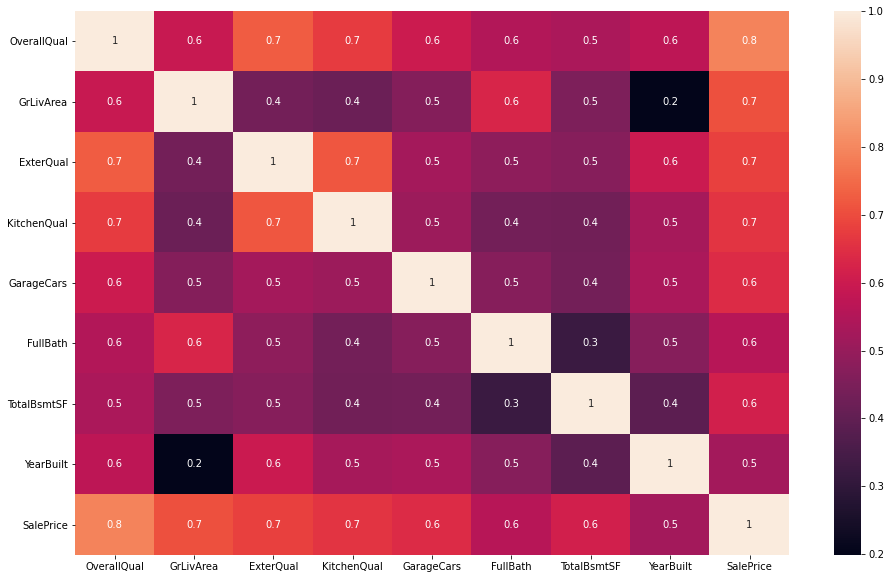

In [949]:
corr = house.corr()
figure = plt.figure(figsize=(16,10))
sns.heatmap(data = corr, annot=True, fmt = '.1g')

In [950]:
sns.pairplot(house, kind = 'scatter', diag_kind = 'hist')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023BB61AA430> (for post_execute):


KeyboardInterrupt: 

< Report on your findings >

Use a multi-linear regression model to answer the following questions: <br>
**[Q2]** Which of the 8 selected features helps to explain the SalePrice? <br>
**[Q3]** How well does the model perform in explaining the Sale Price? <br>
**[Q4]** If you are planning to put your house on sale, which feature of your data you should renovate in order to maximize your Sale Price? (you can ignore the renovation cost in this analysis)

**Notes:**
Check the p-values associated with the coefficients of each variable/feature to identify which are the relevant features in your model. For this task, consider using the package _Statsmodel_.

In [951]:
import statsmodels.formula.api as smf # Method 2
from statsmodels.iolib.summary2 import summary_col # To compare models

In [952]:
# Method 1
model = smf.ols('SalePrice ~ OverallQual', data = house).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          2.19e-313
Time:                        16:04:05   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      

In [953]:
model = smf.ols('SalePrice ~ OverallQual + GrLivArea + ExterQual + KitchenQual + GarageCars + FullBath + TotalBsmtSF + YearBuilt', data = house).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     657.2
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:04:06   Log-Likelihood:                -17426.
No. Observations:                1460   AIC:                         3.487e+04
Df Residuals:                    1451   BIC:                         3.492e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.528e+05   8.98e+04     -6.159      

In [958]:
# Remove Year Built
model = smf.ols('SalePrice ~ OverallQual + GrLivArea + ExterQual + KitchenQual + GarageCars + FullBath + TotalBsmtSF', data = house).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     738.2
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:04:28   Log-Likelihood:                -17437.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1452   BIC:                         3.493e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.475e+05   6201.385    -23.780      

In [961]:
# Remove Full Bath
model = smf.ols('SalePrice ~ OverallQual + GrLivArea + ExterQual + KitchenQual + GarageCars + TotalBsmtSF + YearBuilt', data = house).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     747.5
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:05:20   Log-Likelihood:                -17429.
No. Observations:                1460   AIC:                         3.487e+04
Df Residuals:                    1452   BIC:                         3.492e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.789e+05   8.49e+04     -5.643      

In [962]:
# Remove TotalBsmtSF
model = smf.ols('SalePrice ~ OverallQual + GrLivArea + ExterQual + KitchenQual + GarageCars + YearBuilt', data = house).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     799.4
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:05:39   Log-Likelihood:                -17479.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1453   BIC:                         3.501e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.695e+05   8.73e+04     -6.525      

In [965]:
# Remove Garage Cars
model = smf.ols('SalePrice ~ OverallQual + GrLivArea + ExterQual + KitchenQual + FullBath + TotalBsmtSF + YearBuilt', data = house).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     716.7
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:06:55   Log-Likelihood:                -17453.
No. Observations:                1460   AIC:                         3.492e+04
Df Residuals:                    1452   BIC:                         3.497e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.366e+05   8.78e+04     -8.386      

Q1 <br>
We can conclude that all the 8 variables chosen for the model are the approriate ones and important since each one of them improves the R Square of our model. The one that is less significant to our model is FullBath since it did not improve our score greatly, which can be expected since it was not super correlated with the SalePrice

Q2 <br>
Our model 

Q3 <br> The one feature of our data that is the most important is the Overall Quality, so if I had to change one aspect of my house would be the Overall Quality of the materials and finishes of the house since this affects the price the most

### II.2 - Unsupervised Learning (5 points)

In this challenge, each student is assigned a specific dataset. <br>
The data is in .csv format and you should use the dataset whose number matches the last number of your student ID. <br>

Start by running the following cell to download the data. <br>
The data files will be downloaded to ./DATA/ClusterData/ folder, which is located the same folder as this notebook. <br>
Then load the dataset into a Pandas dataframe. <br>
The data file consists of 5000 2-dimensional datapoints. <br>
These have been artificially generated and do not have any meaning, they are however a good starting point to test the implementation of a clustering algorithm.

In [45]:
r = requests.get('https://www.dropbox.com/s/6scrqrkq9gwxlcp/ClusterData.zip?dl=1', allow_redirects=True)
open('ClusterData.zip', 'wb').write(r.content);
with ZipFile('ClusterData.zip', 'r') as zipObj:
   zipObj.extractall('DATA')

Answer the following questions: <br>

**[Q1]** How many clusters do you identify in the dataset? 

Start by reporting on the number of dimensions in the data. <br>
Use K-means to identify the number of clusters. <br>
Explore the results visually and explain the steps you performed to arrive at your answer. <br>

< Answer here >

**[Q2]** Provide a comparison between the results obtained using K-means with hierarchical clustering. What conclusions do arrive at? Can you reason which clustering technique is more adequate for the current dataset?

Notes:<br>
- Use the "ward" linkage in the Hierarchical Clustering;
- Consider performing the comparison visually, but in the best scenario do it using performance metrics such as the silhouette score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

< Answer here >

## Part III - A Short Data Science Project (40% | 8 points)

The third part of this exam requires a combination of the topics we discussed during the semester, in order to extract valuable insights and value from a dataset.<br>
Consider a dataset that contains personal information and shopping behavior details of over 2 000 customers at the _DS4MKT GOODS™_ store. To achieve better profitability and a data-driven decision-making, Management is considering the application of advanced analytics techniques.

<b>Perform the necessary steps in order to answer the following questions:</b><br>

**[Q1]** Develop a supervised learning model to identify which customers are more likely to accept a future campaign. Hint: Use the result of the last campaign (#6 - Response) as the target variable. <br>
**[Q2]** How good is your model? Is it robust to unseen data? What are the most important characteristics to predict this response? What is the business viability of your model? <br>
**[Q3]** How would you segment the customers based on their product preferences, regardless of total ammount spent? Create a (short) marketing strategy for each one.<br>

__You are expected to support your answers with data, and analysis. It is also expected that you are able to go beyond the features already available in the dataset and create some new ones.__ However, you will not be granted extra points for unnecessary steps, or out of scope analysis. In that sense, be objective in what you do, to support your answer to the above questions.

Start by running the cell below in order to download the data files. <br>
The data files will be downloaded to ./DATA/ folder, which is located the same folder as this notebook. <br>
The files include an excel document "goods_data.xlsx" with the data, and a .txt file with a short description of the dataset.

In [474]:
r = requests.get('https://www.dropbox.com/s/h7v25van21pjaj7/partiii.zip?dl=1', allow_redirects=True)
open('partiii.zip', 'wb').write(r.content);
with ZipFile('partiii.zip', 'r') as zipObj:
   zipObj.extractall('DATA')
shutil.rmtree('DATA/__MACOSX')

In [475]:
def print_classification(y_test, y_pred):
    from sklearn.metrics import classification_report, confusion_matrix
    # Classification Report
    print(classification_report(y_test, y_pred))
    
    # Plot
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize = (5,3))
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

In [476]:
def feature_importance(features, importance):
    df_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
    df_importance['Impact'] = ['Positive' if x > 0 else 'Negative' for x in df_importance['Importance']]
    df_importance.sort_values(by = 'Importance', ascending = False, inplace = True)

    plt.figure(figsize = (6,8))
    sns.barplot(data = df_importance, x = 'Importance', y = 'Feature', hue = 'Impact', hue_order = ['Negative', 'Positive'])
    plt.title('Feature Importance')
    plt.show()

In [477]:
def get_profit(y_test, y_pred, revenue, cost):
    from sklearn.metrics import confusion_matrix 
    cm = confusion_matrix(y_test, y_pred)
    total_cost = (cm[0][1] + cm[1][1]) * cost
    total_revenue = (cm[1][1]) * revenue
    profit = total_revenue - total_cost
    return profit

In [478]:
goods = pd.read_excel('goods_data.xlsx')  
goods.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,0,0,1,0,0,0,3,11,0


In [479]:
print(goods.shape)
print(goods.columns)

(2240, 29)
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], dtype='object')


In [480]:
goods.shape

(2240, 29)

In [481]:
goods.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp1             int64
AcceptedCmp2             int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [482]:
# Change Dt_Customer to Date Time type since it is wrongly classified
goods['Dt_Customer'] = pd.to_datetime(goods['Dt_Customer'])

In [483]:
goods.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
Complain                        int64
Z_CostContac

In [484]:
# Split Data 
from sklearn.model_selection import train_test_split

train, test = train_test_split(goods, stratify = goods['Response'], test_size = 0.2, random_state = 0)

In [485]:
# Check the dimensionality of each subset
print(train.shape)
print(test.shape)

(1792, 29)
(448, 29)


In [486]:
# Check the response rate in each subset
print(train['Response'].mean())
print(test['Response'].mean())

0.14899553571428573
0.14955357142857142


In [487]:
# Data Types
train.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
Complain                        int64
Z_CostContac

In [488]:
# Summary of the numerical variables
train.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
count,1792.000000,1792.000000,1772.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.0,1792.0,1792.000000
mean,5597.602121,1968.841518,51627.418172,0.444196,0.507254,48.833147,298.594866,25.906250,166.273996,36.661272,26.420759,43.655134,2.350446,4.050781,2.637835,5.776786,5.341518,0.061942,0.013393,0.070312,0.070312,0.071429,0.008371,3.0,11.0,0.148996
std,3238.748416,11.854200,21753.547510,0.533846,0.541884,29.032021,332.827244,39.600618,228.655061,53.550236,40.639436,51.980695,1.959375,2.766996,2.956974,3.265192,2.402654,0.241117,0.114982,0.255744,0.255744,0.257611,0.091132,0.0,0.0,0.356183
min,0.000000,1899.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2852.000000,1959.750000,34930.250000,0.000000,0.000000,24.000000,23.000000,1.000000,15.000000,2.000000,1.000000,8.750000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5501.500000,1970.000000,51038.000000,0.000000,0.000000,49.000000,171.000000,8.000000,66.000000,12.000000,8.000000,24.000000,2.000000,3.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68098.250000,1.000000,1.000000,74.000000,493.000000,32.000000,224.500000,49.000000,31.000000,54.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [489]:
# Summary of the categorical variables
train.describe(include = 'object')

,Education,Marital_Status
count,1792,1792
unique,5,8
top,Graduation,Married
freq,903,691


In [490]:
# Summary of the categorical variables
train.describe(include = 'datetime')

,Dt_Customer
count,1792
unique,637
top,2012-08-31 00:00:00
freq,11
first,2012-08-01 00:00:00
last,2014-06-29 00:00:00


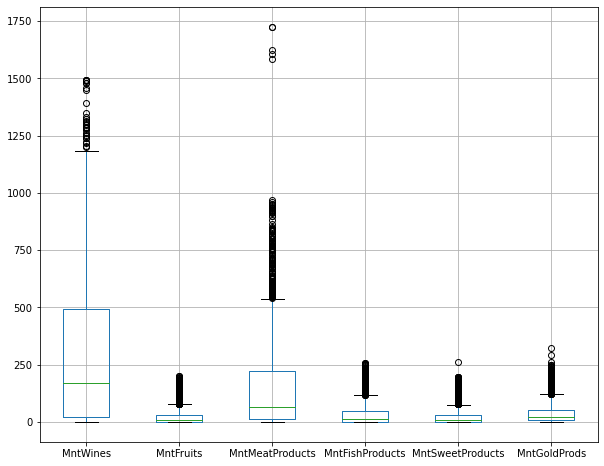

In [491]:
# Visualization of costumers preference
plt.figure(figsize = (10, 8))
train[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].boxplot()
plt.show()

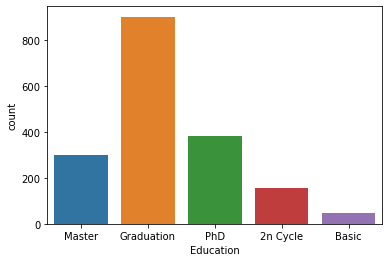

In [492]:
sns.countplot(x = 'Education', data = train)

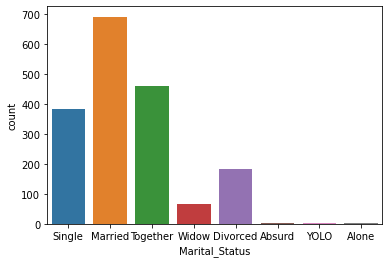

In [493]:
sns.countplot(x = 'Marital_Status', data = train) 

In [494]:
train.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 20
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [495]:
# Fix missing values, since it is a numerical variable and we do not have that many missing values we will replace it with median
train.fillna(train.median(), inplace = True)
test.fillna(test.median(), inplace = True)

In [496]:
train.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [497]:
# Check the correlation between all features
# Find the most correlated variables
train.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.028217,-0.003783,0.004836,-0.028024,-0.045889,-0.033921,0.007038,-0.003921,-0.019172,0.001796,-0.007885,-0.046337,-0.035521,-0.001022,-0.025004,-0.014436,-0.006879,-0.038560,-0.022114,-0.017634,-0.012065,0.022475,NaN,NaN,-0.022846
Year_Birth,0.028217,1.000000,-0.205231,0.222353,-0.344898,-0.028342,-0.166458,-0.020278,-0.031334,-0.055493,-0.034117,-0.097726,-0.066671,-0.178236,-0.129866,-0.138906,0.104606,-0.014145,-0.007864,0.039223,-0.057284,0.009011,-0.060793,NaN,NaN,0.004670
Income,-0.003783,-0.205231,1.000000,-0.504188,0.031628,0.006263,0.677848,0.494739,0.679317,0.501729,0.509479,0.378438,-0.091061,0.440022,0.683567,0.605565,-0.642651,0.327004,0.112042,-0.024066,0.214716,0.392275,-0.037904,NaN,NaN,0.159498
Kidhome,0.004836,0.222353,-0.504188,1.000000,-0.028517,-0.004762,-0.495549,-0.380171,-0.435969,-0.390884,-0.373196,-0.366209,0.211939,-0.368699,-0.494025,-0.498196,0.441904,-0.187848,-0.087875,0.016486,-0.163457,-0.206479,0.026822,NaN,NaN,-0.083982
Teenhome,-0.028024,-0.344898,0.031628,-0.028517,1.000000,0.017982,-0.009575,-0.178799,-0.271364,-0.215890,-0.168339,-0.017831,0.383069,0.161182,-0.123630,0.059611,0.135329,-0.155145,-0.010521,-0.039943,0.028549,-0.191703,0.015729,NaN,NaN,-0.151692
Recency,-0.045889,-0.028342,0.006263,-0.004762,0.017982,1.000000,0.009676,-0.020522,0.015687,-0.004218,0.014119,0.021435,-0.000218,-0.007589,0.012382,-0.010571,-0.020603,-0.010647,-0.002006,-0.030680,0.020381,-0.008484,0.018255,NaN,NaN,-0.197592
MntWines,-0.033921,-0.166458,0.677848,-0.495549,-0.009575,0.009676,1.000000,0.396169,0.568272,0.414400,0.388330,0.394050,0.011147,0.548684,0.629454,0.653557,-0.326365,0.382353,0.203789,0.070005,0.351413,0.467053,-0.043865,NaN,NaN,0.240823
MntFruits,0.007038,-0.020278,0.494739,-0.380171,-0.178799,-0.020522,0.396169,1.000000,0.541050,0.605580,0.570672,0.403937,-0.122497,0.300581,0.473159,0.469268,-0.413289,0.197554,0.003219,0.005282,0.029044,0.232062,-0.025620,NaN,NaN,0.140132
MntMeatProducts,-0.003921,-0.031334,0.679317,-0.435969,-0.271364,0.015687,0.568272,0.541050,1.000000,0.554476,0.530604,0.360393,-0.107595,0.284490,0.742146,0.468798,-0.547620,0.317498,0.051063,0.025746,0.110810,0.394246,-0.038132,NaN,NaN,0.241462
MntFishProducts,-0.019172,-0.055493,0.501729,-0.390884,-0.215890,-0.004218,0.414400,0.605580,0.554476,1.000000,0.584836,0.432250,-0.130493,0.290264,0.528948,0.454680,-0.441633,0.260694,0.013342,0.002515,0.030320,0.186034,-0.030081,NaN,NaN,0.121087


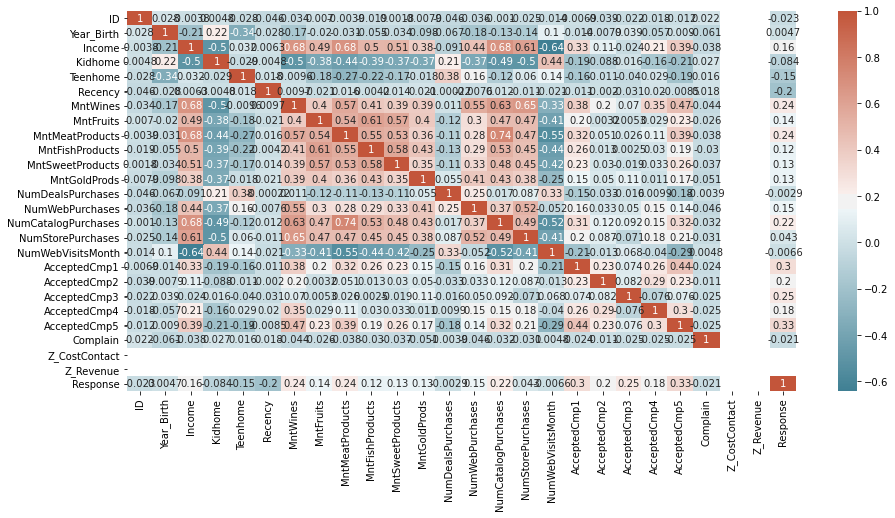

In [498]:
# cmap = sns.diverging_palette(220, 20, as_cmap=True) optional colors
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (15,7))
sns.heatmap(train.corr(), annot = True, cmap = cmap)
plt.show()

We do not have correlated features (90% correlation) so we do not need to drop

### New Features

In [499]:
# Creating a new variable named MntTotal that gives the total spent on products
train['TotalMnt'] = train['MntWines']+train['MntFruits']+train['MntMeatProducts']+train['MntFishProducts']+train['MntSweetProducts']+train['MntGoldProds']
test['TotalMnt'] = test['MntWines']+test['MntFruits']+test['MntMeatProducts']+test['MntFishProducts']+test['MntSweetProducts']+test['MntGoldProds']
test.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response,TotalMnt
848,2895,1963,Graduation,Single,49980.0,0,1,2013-10-23,79,104,1,54,13,9,14,2,3,1,5,5,0,0,0,0,0,0,3,11,0,195
1613,1764,1975,Graduation,Single,33955.0,1,0,2013-08-09,92,100,2,128,23,7,10,4,5,1,5,8,0,0,0,0,0,0,3,11,0,270
1893,6892,1968,Graduation,Divorced,61671.0,0,1,2014-06-03,23,641,7,56,0,0,28,8,10,4,6,8,1,0,0,1,0,0,3,11,0,732
2052,2591,1959,Graduation,Widow,76320.0,0,1,2014-06-22,49,526,35,214,69,53,35,2,6,3,4,2,0,0,0,0,0,0,3,11,0,932
732,9384,1978,Graduation,Married,66373.0,1,1,2013-06-12,57,328,9,124,12,24,109,7,4,2,10,3,0,0,0,0,0,0,3,11,0,606


In [500]:
# Convert Education to a binary variable where:
# Higher Education includes Graduation, Master or PhD (1)
# Else 0

import numpy as np
train['Higher_Educ'] = np.where((train['Education']=='Graduation')|
                               (train['Education']=='Master')|
                               (train['Education']=='PhD'),1,0)
train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response,TotalMnt,Higher_Educ
1037,67,1972,Master,Single,46423.0,1,1,2013-09-18,6,68,0,16,0,0,8,3,2,0,4,7,0,0,0,0,0,0,3,11,0,92,1
1729,3828,1951,Graduation,Married,71107.0,0,1,2013-02-17,61,533,10,217,198,174,195,2,7,6,13,4,0,0,0,0,0,0,3,11,0,1327,1
1597,3409,1984,Graduation,Single,36108.0,1,0,2013-10-15,68,141,8,129,3,11,47,3,7,1,4,9,0,0,1,0,0,0,3,11,0,339,1
1512,9451,1965,Graduation,Married,73538.0,0,1,2012-11-25,92,811,76,428,99,137,107,3,10,4,9,7,0,0,0,0,0,0,3,11,0,1658,1
1234,6211,1976,PhD,Together,37395.0,1,0,2014-05-02,47,18,0,9,0,1,11,1,1,0,3,6,0,0,0,0,0,0,3,11,0,39,1


In [501]:
test['Higher_Educ'] = np.where((test['Education']=='Graduation')|
                               (test['Education']=='Master')|
                               (test['Education']=='PhD'),1,0)
test.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response,TotalMnt,Higher_Educ
848,2895,1963,Graduation,Single,49980.0,0,1,2013-10-23,79,104,1,54,13,9,14,2,3,1,5,5,0,0,0,0,0,0,3,11,0,195,1
1613,1764,1975,Graduation,Single,33955.0,1,0,2013-08-09,92,100,2,128,23,7,10,4,5,1,5,8,0,0,0,0,0,0,3,11,0,270,1
1893,6892,1968,Graduation,Divorced,61671.0,0,1,2014-06-03,23,641,7,56,0,0,28,8,10,4,6,8,1,0,0,1,0,0,3,11,0,732,1
2052,2591,1959,Graduation,Widow,76320.0,0,1,2014-06-22,49,526,35,214,69,53,35,2,6,3,4,2,0,0,0,0,0,0,3,11,0,932,1
732,9384,1978,Graduation,Married,66373.0,1,1,2013-06-12,57,328,9,124,12,24,109,7,4,2,10,3,0,0,0,0,0,0,3,11,0,606,1


In [515]:
# Creating a new variable named age 
from datetime import date
train['Age'] = date.today().year - train['Year_Birth']
test['Age'] = date.today().year - test['Year_Birth']
train.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response,TotalMnt,Higher_Educ,Age,MS_Alone,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow,MS_YOLO
1037,67,1972,46423.0,1,1,6,68,0,16,0,0,8,3,2,0,4,7,0,0,0,0,0,0,3,11,0,92,1,48,0,0,0,1,0,0,0
1729,3828,1951,71107.0,0,1,61,533,10,217,198,174,195,2,7,6,13,4,0,0,0,0,0,0,3,11,0,1327,1,69,0,0,1,0,0,0,0
1597,3409,1984,36108.0,1,0,68,141,8,129,3,11,47,3,7,1,4,9,0,0,1,0,0,0,3,11,0,339,1,36,0,0,0,1,0,0,0
1512,9451,1965,73538.0,0,1,92,811,76,428,99,137,107,3,10,4,9,7,0,0,0,0,0,0,3,11,0,1658,1,55,0,0,1,0,0,0,0
1234,6211,1976,37395.0,1,0,47,18,0,9,0,1,11,1,1,0,3,6,0,0,0,0,0,0,3,11,0,39,1,44,0,0,0,0,1,0,0


In [503]:
# Marital Status -> One-Hot-Encoding (with prefix MS)

dummies = pd.get_dummies(train['Marital_Status'], prefix = 'MS', drop_first = True)

train = pd.concat([train, dummies], axis = 1)

dummies = pd.get_dummies(test['Marital_Status'], prefix = 'MS', drop_first = True)

test = pd.concat([test, dummies], axis = 1)

In [504]:
train[['Marital_Status', 'MS_Married', 'MS_Single', 'MS_Together', 'MS_Widow']].head()

,Marital_Status,MS_Married,MS_Single,MS_Together,MS_Widow
1037,Single,0,1,0,0
1729,Married,1,0,0,0
1597,Single,0,1,0,0
1512,Married,1,0,0,0
1234,Together,0,0,1,0


In [516]:
# Creating a variable that contains only the year of the customer's enrolment with the company
train['Year_Customer'] = train['Dt_Customer'].dt.year
test['Year_Customer'] = test['Dt_Customer'].dt.year
test.head()

KeyError: 'Dt_Customer'

In [505]:
# Drop the numerical variables since we can not use them in our model

cols_to_drop = ['Marital_Status','Education','Dt_Customer', 'Year_Birth']

train.drop(columns = cols_to_drop, inplace = True)
test.drop(columns = cols_to_drop, inplace = True)

### Split data into X and Y

In [506]:
#x_train - all training data except ID and Response
#y_train - training Response
#x_test - all testing data except ID and Response
#y_test - testing Response

In [507]:
x_train = train.drop(columns = ['ID', 'Response'])
y_train = train['Response']

x_test = test.drop(columns = ['ID', 'Response'])
y_test = test['Response']

In [508]:
x_train.dtypes

Year_Birth               int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp1             int64
AcceptedCmp2             int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
TotalMnt                 int64
Higher_Educ              int32
Age                      int64
MS_Alone                 uint8
MS_Divorced              uint8
MS_Married               uint8
MS_Single                uint8
MS_Together              uint8
MS_Widow

In [509]:
# Import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler() named minmax_scaler.
scaler = MinMaxScaler()

# Train


x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns, index = x_train.index)

# Test
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns, index = x_test.index)

In [510]:
x_test_scaled.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,TotalMnt,Higher_Educ,Age,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow
848,0.686275,0.069354,0.0,0.5,0.797980,0.071135,0.005263,0.053917,0.050388,0.034221,0.038674,0.133333,0.111111,0.090909,0.384615,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084150,1.0,0.313725,0.0,0.0,1.0,0.0,0.0
1613,0.803922,0.045171,0.5,0.0,0.929293,0.068399,0.010526,0.129196,0.089147,0.026616,0.027624,0.266667,0.185185,0.090909,0.384615,0.421053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117542,1.0,0.196078,0.0,0.0,1.0,0.0,0.0
1893,0.735294,0.086997,0.0,0.5,0.232323,0.438440,0.036842,0.055951,0.000000,0.000000,0.077348,0.533333,0.370370,0.363636,0.461538,0.421053,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323241,1.0,0.264706,1.0,0.0,0.0,0.0,0.0
2052,0.647059,0.109104,0.0,0.5,0.494949,0.359781,0.184211,0.216684,0.267442,0.201521,0.096685,0.133333,0.222222,0.272727,0.307692,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412289,1.0,0.352941,0.0,0.0,0.0,0.0,1.0
732,0.833333,0.094093,0.5,0.5,0.575758,0.224350,0.047368,0.125127,0.046512,0.091255,0.301105,0.466667,0.148148,0.181818,0.769231,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267142,1.0,0.166667,0.0,1.0,0.0,0.0,0.0


In [511]:
# Apply the model
# The model chosen was Logistic Regression since our target outcome is a binary variable

In [512]:
from sklearn.linear_model import LogisticRegression

In [513]:
model = LogisticRegression(random_state = 0)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

ValueError: X has 32 features per sample; expecting 34

In [469]:
profit_reg = get_profit(y_test = y_test, y_pred = y_pred, revenue = revenue, cost = cost)
print('Total Profit: {} €'.format(profit_reg))

NameError: name 'y_pred' is not defined

In [470]:
print_classification(y_test = y_test, y_pred = y_pred)

NameError: name 'y_pred' is not defined

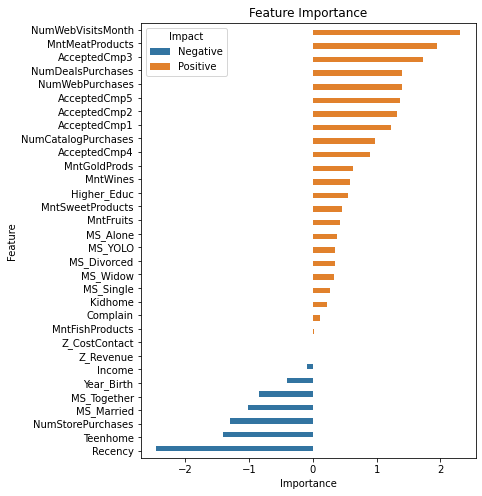

In [471]:
feature_importance(features = x_train.columns, importance = model.coef_[0])

Develop a supervised learning model to identify which customers are more likely to accept a future campaign. Hint: Use the result of the last campaign (#6 - Response) as the target variable. <br>
[Q2] How good is your model? Is it robust to unseen data? What are the most important characteristics to predict this response? What is the business viability of your model? <br>
[Q3] How would you segment the customers based on their product preferences, regardless of total ammount spent? Create a (short) marketing strategy for each one.